In [98]:
#Laster inn pakker
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

#Oppgave 1
#Laster inn data
url = "https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132" 

#Laste inn tabeller fra url
tabeller = pd.read_html(url) 

#Gjør om til dataframe
df_motor = tabeller[0]

#Viser tabellen
display(df_motor)



,Modell (temp. varierte fra 0° til -10°),WLTP-tall,STOPP,Avvik
0,Tesla Model 3 LR Dual motor,"614 km/14,7 kWh",521 km,"-15,15 %"
1,Mercedes-Benz EQS 580 4matic,"645 km/18,3 kWh",513 km,"-20,47 %"
2,BMW iX xDrive50,"591 km/21,4 kWh",503 km,"-14,89 %"
3,Tesla Model Y LR Dual motor,"507 km/16,9 kWh",451 km,"-11,05 %"
4,Volkswagen ID.3 PRO S,"539 km/16,3 kWh",435 km,"-19,29 %"
5,Kia EV6 2WD,"528 km/16,5 kWh",429 km,"-18,75 %"
6,NIO ES8 LR 7-seter,"488 km/21,5 kWh",425 km,"-12,91 %"
7,Kia EV6 4WD,"484 km/18,0 kWh",423 km,"-12,60 %"
8,Volkswagen ID.4 Pro,"485 km/18,4 kWh",414 km,"-14,64 %"
9,Hyundai Ioniq 5 2WD,"481 km/16,8 kWh",408 km,"-15,18 %"


In [99]:
#Oppgave 2
#Vask dataen til en tabell med bare relevante tall og gode overskrifter.

#Endrer kolonne navn
df_motor.columns = ['Modell', 'Wltp KM', 'Stopp KM', 'Avvik i prosent'] 

#gjør wltp tall og energiforbuk til egne kolonner
df_motor[['Wltp KM', 'Energiforbruk kwh']] = df_motor['Wltp KM'].str.split('/', expand=True) 

#fjerner rader som inneholder x i stopp_km, da disse ikke har testresultater.
df_motor = df_motor.drop(index=df_motor[df_motor['Stopp KM'] == 'x'].index) 

#fjerner KM i wltp observasjonene
df_motor['Wltp KM'] = pd.to_numeric(df_motor['Wltp KM'].str.replace(' km', '')) 

#fjerner KM i stopp observasjonen 
df_motor['Stopp KM'] = pd.to_numeric(df_motor['Stopp KM'].str.replace(' km', '')) 

#viser tabellen
display(df_motor)

,Modell,Wltp KM,Stopp KM,Avvik i prosent,Energiforbruk kwh
0,Tesla Model 3 LR Dual motor,614,521,"-15,15 %","14,7 kWh"
1,Mercedes-Benz EQS 580 4matic,645,513,"-20,47 %","18,3 kWh"
2,BMW iX xDrive50,591,503,"-14,89 %","21,4 kWh"
3,Tesla Model Y LR Dual motor,507,451,"-11,05 %","16,9 kWh"
4,Volkswagen ID.3 PRO S,539,435,"-19,29 %","16,3 kWh"
5,Kia EV6 2WD,528,429,"-18,75 %","16,5 kWh"
6,NIO ES8 LR 7-seter,488,425,"-12,91 %","21,5 kWh"
7,Kia EV6 4WD,484,423,"-12,60 %","18,0 kWh"
8,Volkswagen ID.4 Pro,485,414,"-14,64 %","18,4 kWh"
9,Hyundai Ioniq 5 2WD,481,408,"-15,18 %","16,8 kWh"


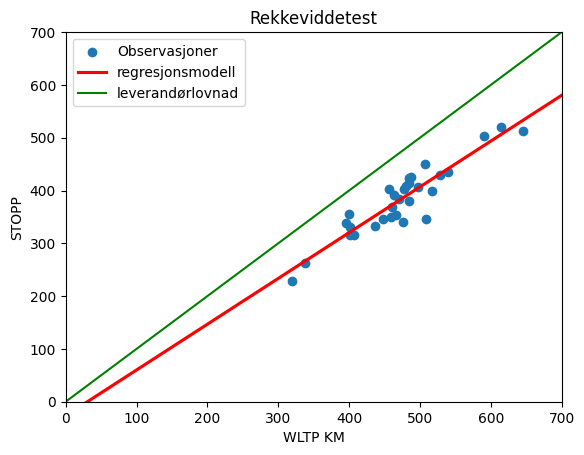

In [110]:
#Oppgave 3 Lag en regresjonsmodell av dataframe

#linspace
np.linspace(0,700, num=10)
            
#Plotter modellen
plt.xlim([0, 700]) 
plt.ylim([0, 700])  
plt.scatter(df_motor["Wltp KM"], df_motor["Stopp KM"], label="Observasjoner")
sns.regplot(x='Wltp KM', y='Stopp KM', data=df_motor, scatter=False, ci=None, truncate=False,
color="red", label="regresjonsmodell") 
plt.plot(np.linspace(0, 700, num=5), np.linspace(0, 700, num=5),color="green", label="leverandørlovnad")
plt.title('Rekkeviddetest') 
plt.xlabel('WLTP KM', loc="center") 
plt.ylabel('STOPP', loc="center") 
plt.legend(loc="best") 
plt.show()
